# Car Price Prediction Project

The Project aims to predict the price of the used cars based on several factors, like the Car Name, the kilometers driven, selling type, transmission and others. 

## Data Understanding

Download the required libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
data = pd.read_csv('C:/Users/navya/Car Price Prediction/car_data.csv')

In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
len(data['Car_Name'].unique())

98

In [7]:
data.shape

(301, 9)

In [8]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
data.duplicated().sum()

2

In [11]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [12]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

## Data Visualisation

Text(0.5, 1.0, 'Plot for Selling Price')

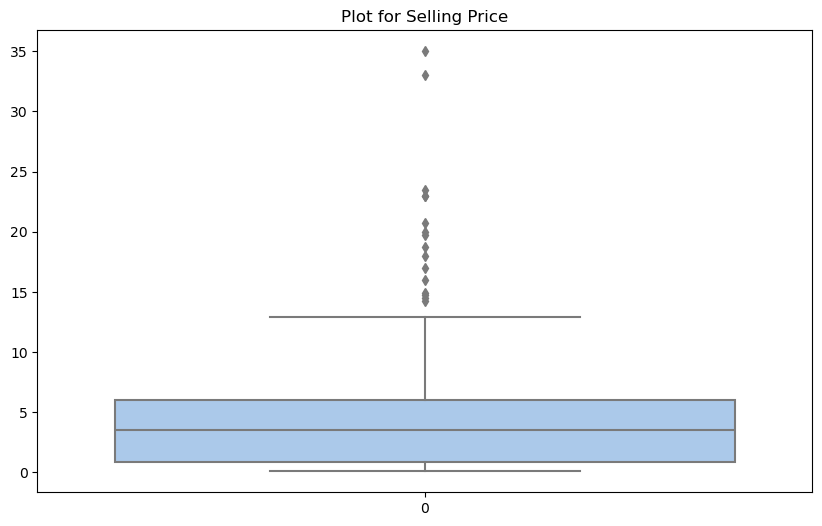

In [13]:
#check for the outliers

plt.figure(figsize=(10,6))
sns.boxplot(data['Selling_Price'], palette='pastel')
plt.title('Plot for Selling Price')

Correlation Heatmap is formed only from the columns having numeric value. Create a separate dataframe for columns will numeric value only. 

In [14]:
# Creating list of all numeric columns
num_col = ['Year','Selling_Price','Present_Price','Driven_kms']

#dataset containing only numeric values
num_data = data[num_col]

#calculate the correlation matrix
corr_matrix = num_data.corr()

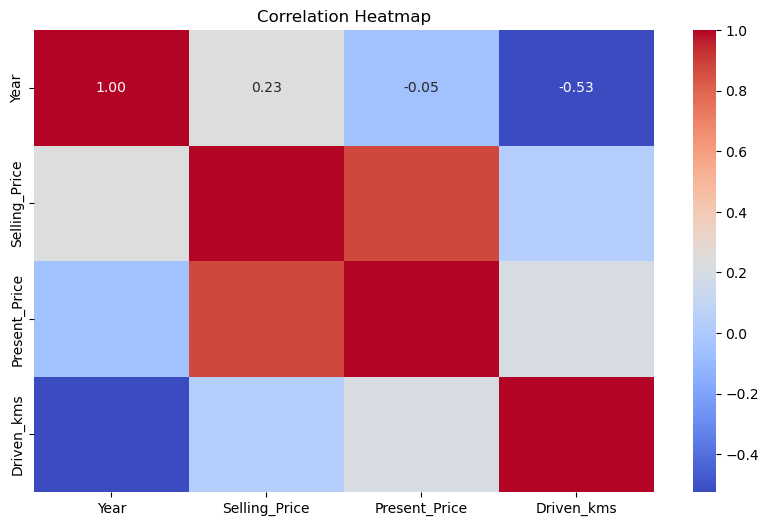

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, cmap= 'coolwarm', fmt='.2f', annot=True)
plt.title('Correlation Heatmap')
plt.show()

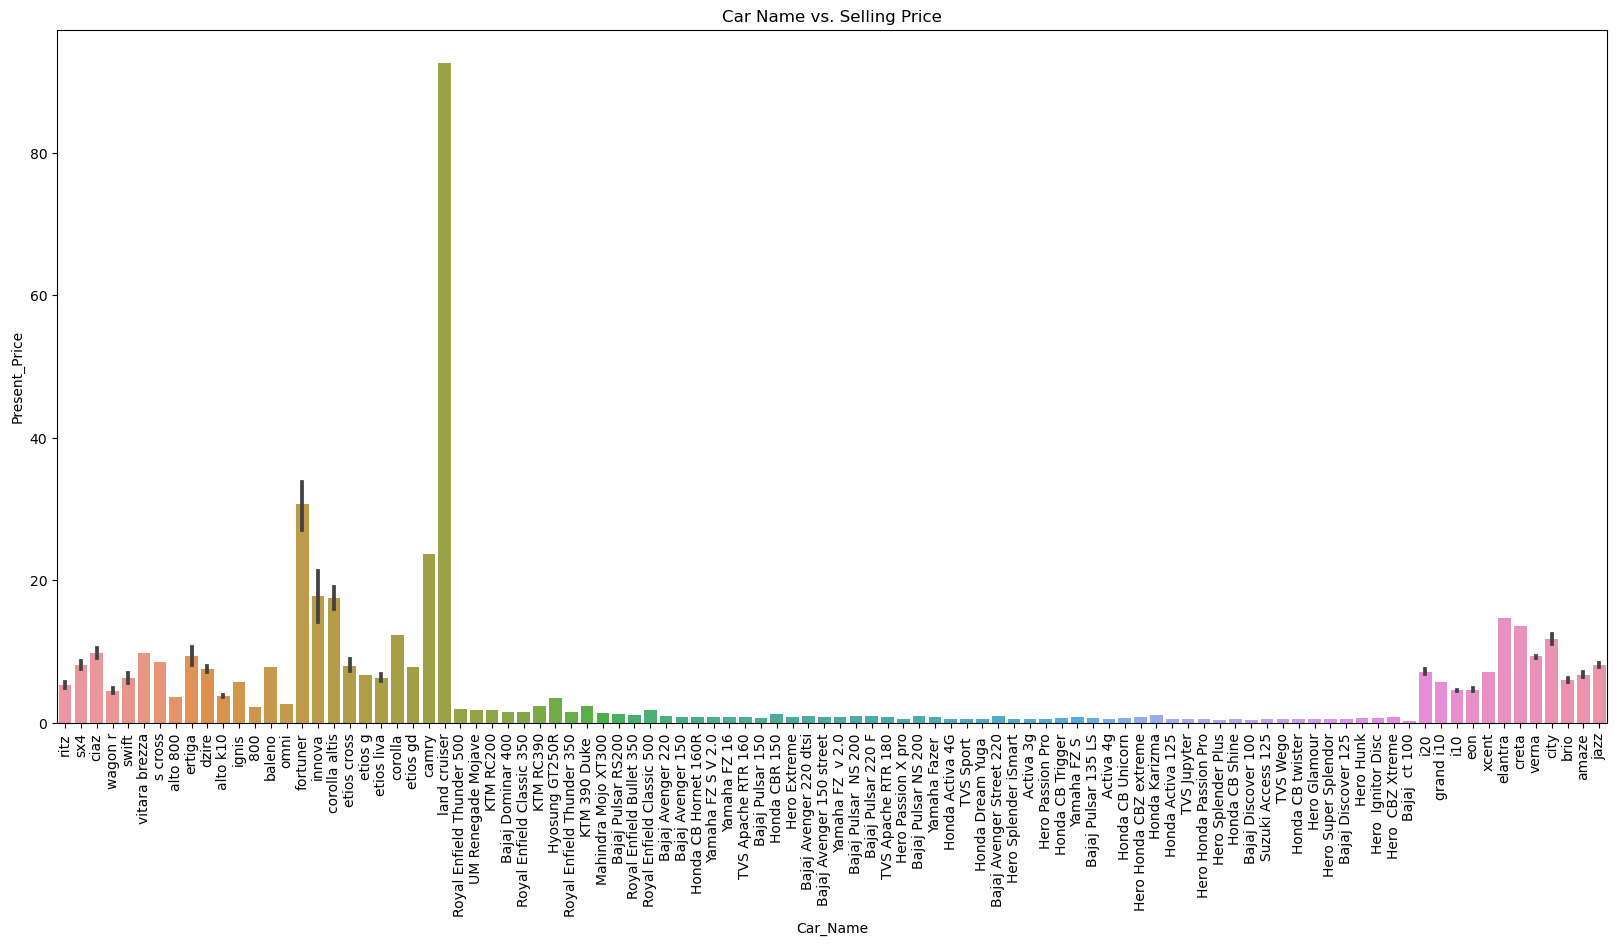

In [16]:
plt.figure(figsize=(20,9))
sns.barplot(x='Car_Name', y='Present_Price', data = data).set_title('Car Name vs. Selling Price')
plt.xticks(rotation='vertical')
plt.show()

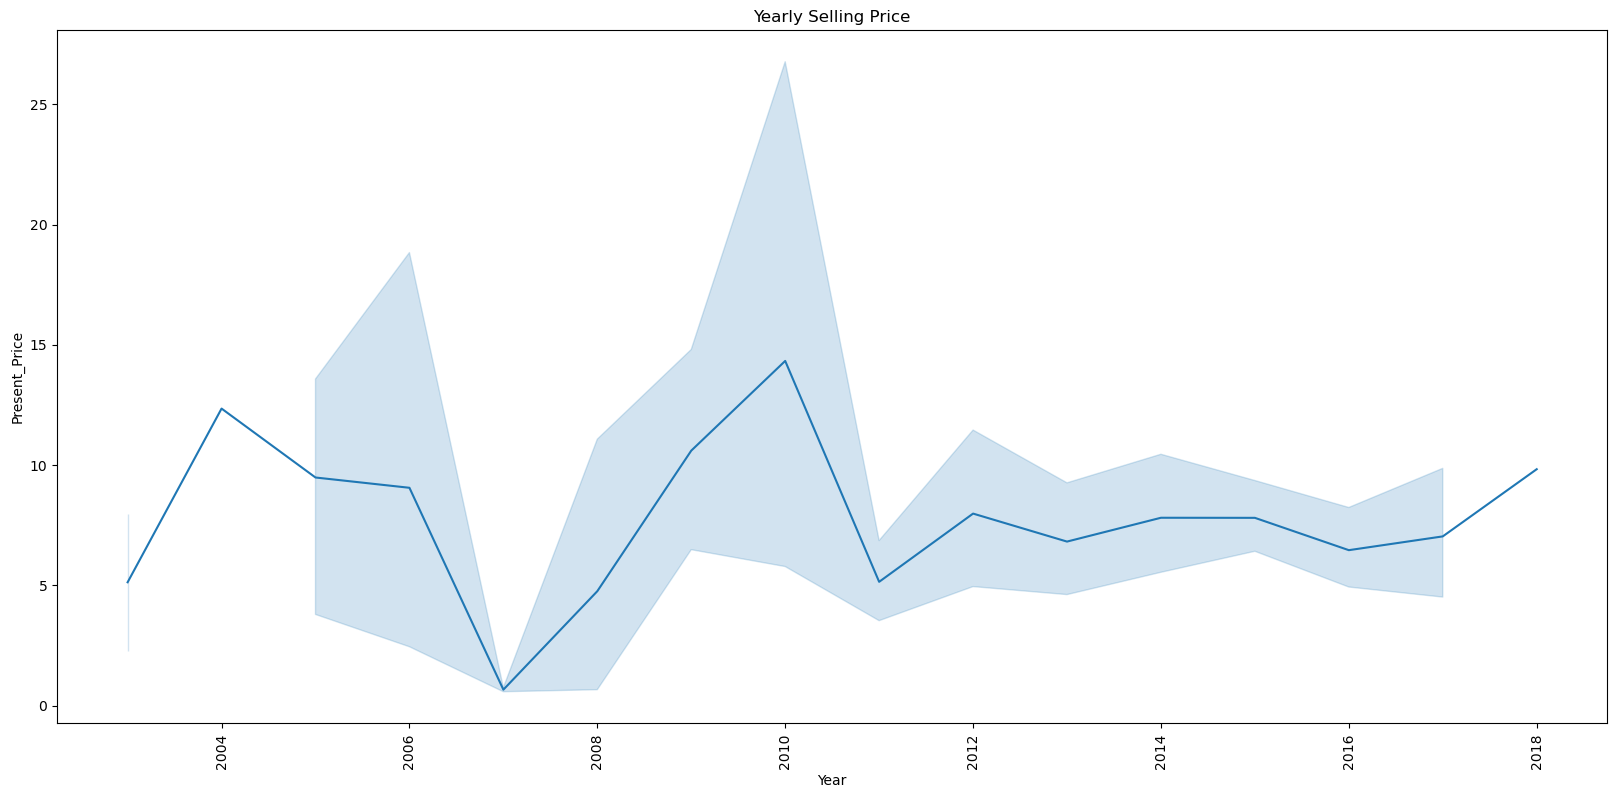

In [17]:
plt.figure(figsize=(20,9))
sns.lineplot(x='Year', y='Present_Price', data = data).set_title('Yearly Selling Price')
plt.xticks(rotation='vertical')
plt.show()

<Figure size 2000x600 with 0 Axes>

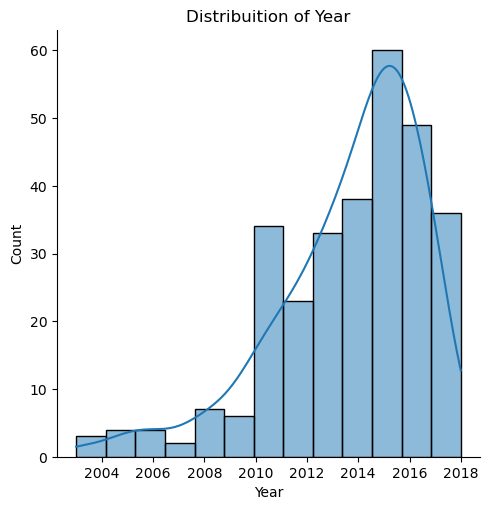

<Figure size 2000x600 with 0 Axes>

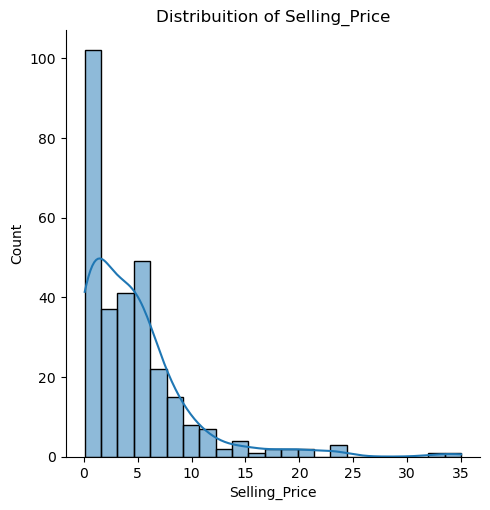

<Figure size 2000x600 with 0 Axes>

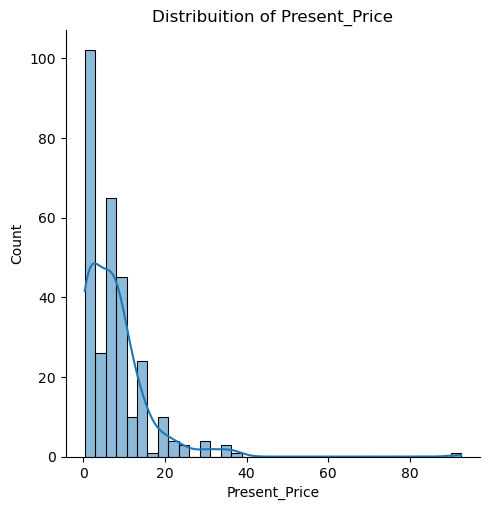

<Figure size 2000x600 with 0 Axes>

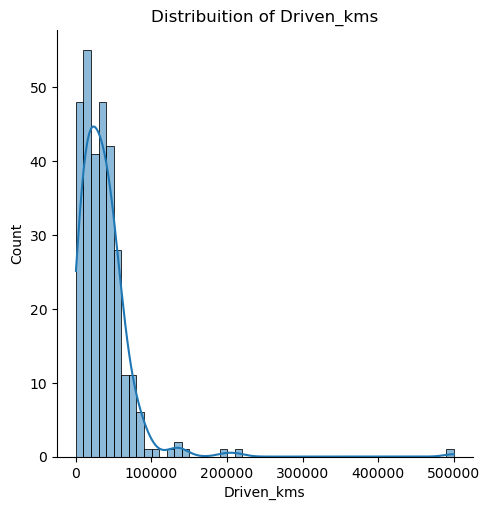

In [18]:
for feature in num_col:
    plt.figure(figsize=(20,6))
    sns.displot(data=data, x=feature, kde = True)
    plt.title(f'Distribuition of {feature}')
    plt.show()

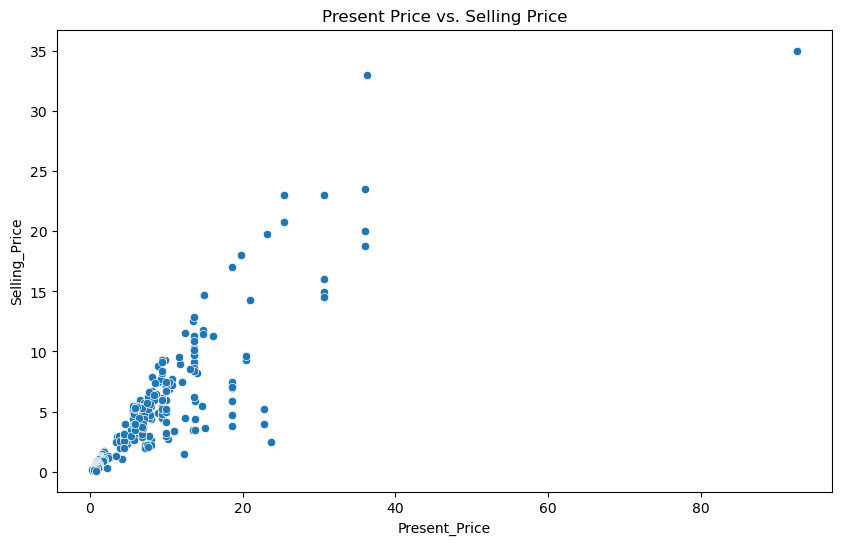

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Present_Price'], y=data['Selling_Price'])
plt.title('Present Price vs. Selling Price')
plt.show()

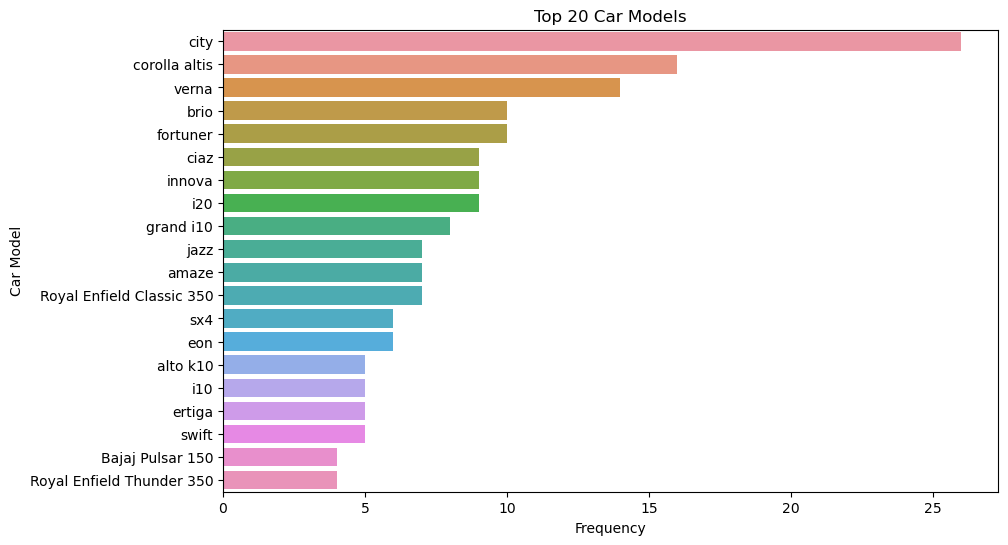

In [20]:
n = 20
top_Car_models = data['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10,6))
sns.barplot(x=top_Car_models.values , y=top_Car_models.index)
plt.title('Top 20 Car Models')
plt.xlabel("Frequency")
plt.ylabel("Car Model")
plt.show()

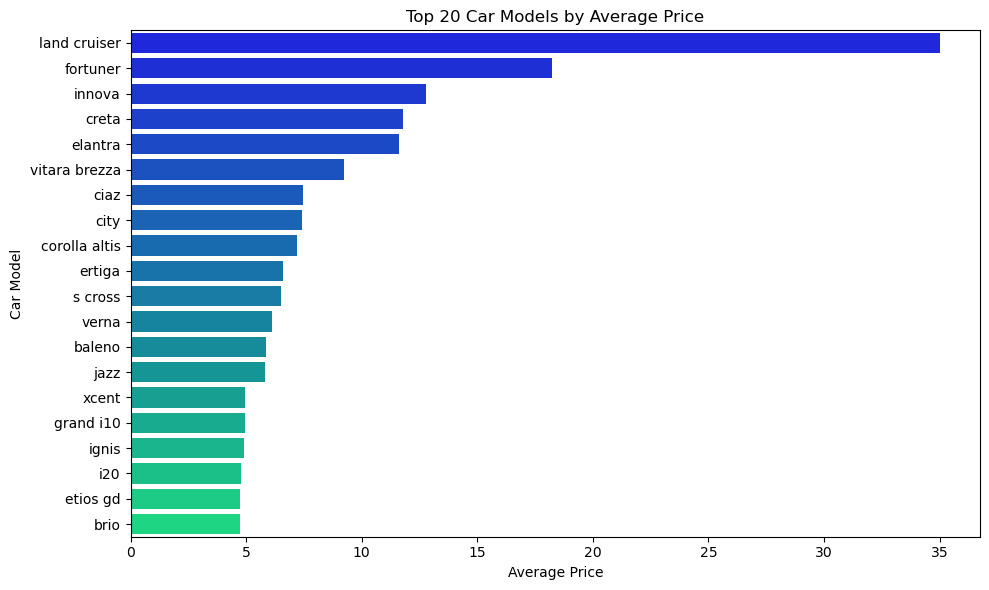

In [21]:
#calculate average price for each car model
avg_price_by_car = data.groupby("Car_Name")['Selling_Price'].mean().sort_values(ascending = False)

#plot the top N models by average price
n=20
top_car_models = avg_price_by_car.head(n)
plt.figure(figsize=(10,6))
sns.barplot(x=top_car_models.values, y=top_car_models.index, palette = 'winter')
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

## Data Cleaning

In [22]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [23]:
print(data['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [24]:
print(data['Selling_type'].unique())

['Dealer' 'Individual']


In [25]:
print(data['Transmission'].unique())

['Manual' 'Automatic']


Encode categorical features

In [26]:
data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1,'CNG':2}}, inplace=True)

In [27]:
data.replace({'Selling_type':{'Dealer':0, 'Individual':1}}, inplace = True)

In [28]:
data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

In [29]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Predictions

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
pip install scikit-learn==1.3.2

Note: you may need to restart the kernel to use updated packages.


In [32]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Car_Name','Selling_Price'], axis=1), data['Selling_Price'], test_size=0.2, random_state=13)

In [33]:
X_train

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
69,2016,20.91,12000,0,0,0,0
109,2017,1.47,11000,0,1,0,0
53,2013,30.61,135000,1,1,1,0
103,2017,1.60,1200,0,1,0,0
243,2016,7.60,7000,0,0,0,0
...,...,...,...,...,...,...,...
246,2012,6.79,35000,0,0,0,0
232,2015,14.79,12900,0,0,1,0
16,2015,10.79,41678,1,0,0,0
75,2015,6.80,36000,0,0,0,0


In [34]:
y_train

69     14.25
109     1.20
53     16.00
103     1.45
243     6.25
       ...  
246     3.75
232    11.45
16      7.25
75      3.95
178     0.35
Name: Selling_Price, Length: 239, dtype: float64

In [35]:
lmodel = LinearRegression()
lmodel.fit(X_train, y_train)

LinearRegression()

In [36]:
yhat = lmodel.predict(X_test)
mse = mean_squared_error(yhat, y_test)
r2 = r2_score(yhat, y_test)

In [37]:
print('MSE:', mse)
print('r2 Score:', r2)

MSE: 2.405203022616819
r2 Score: 0.8745653385894823


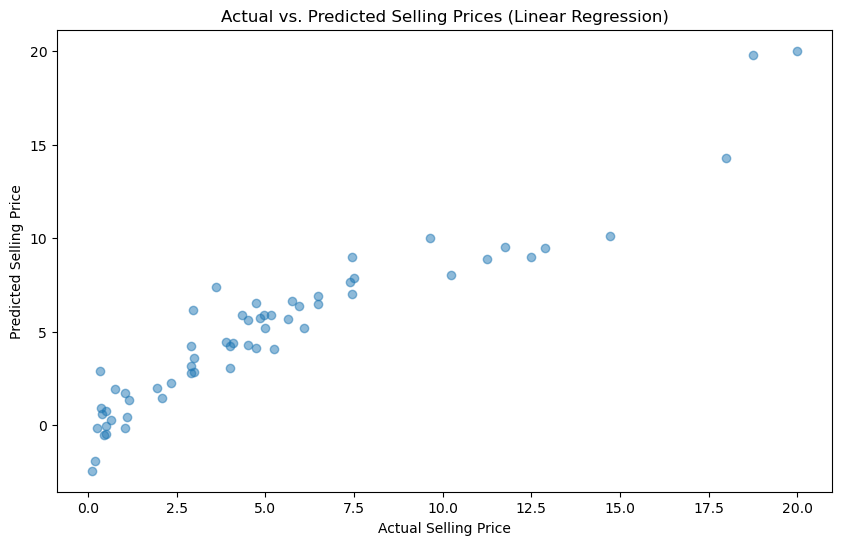

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, alpha=0.5)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Selling Prices (Linear Regression)')
plt.show()

In [39]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=17)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_Y_pred = rf_model.predict(X_test)

# Calculate performance metrics for the Random Forest model
rf_mse = mean_squared_error(y_test, rf_Y_pred)
rf_r2 = r2_score(y_test, rf_Y_pred)

print(f"Random Forest Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"Random Forest R-squared (R2): {rf_r2:.2f}")

Random Forest Mean Squared Error (MSE): 1.42
Random Forest R-squared (R2): 0.94


In [40]:
### Hyperparameters
# no of trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num =12)]
#print(n_estimators)
# no of features
max_features = ['auto', 'sqrt']
# max no of levels i.e. depth
max_depth = [int(x) for x in np.linspace(5, 30,num = 60)]
# min no of samples req to split a node
min_samples_split = [2,5,10,15,100]
# min no of samples req at each leaf node
min_samples_leaf = [1,2,5,10]

In [41]:
random_grid = {'n_estimators' : n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 5, 5, 6, 6, 7, 7, 7, 8, 8, 9, 9, 10, 10, 10, 11, 11, 12, 12, 13, 13, 13, 14, 14, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 23, 23, 24, 24, 24, 25, 25, 26, 26, 27, 27, 27, 28, 28, 29, 29, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [42]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state=42, n_jobs= 1)

In [43]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.2s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 5, 5, 6, 6, 7, 7, 7, 8,
                                                      8, 9, 9, 10, 10, 10, 11,
                                                      11, 12, 12, 13, 13, 13,
                                                      14, 14, 15, 15, 16, 16,
                                                      16, 17, ...],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
# # Make predictions
# data_new = pd.DataFrame({ }, index = [0])  # Example new car data
# predicted_price = lmodel.predict(new_car)
# print('Predicted Selling Price:', predicted_price[0])

In [45]:
import pickle
with open("car_price_prediction.pkl","wb") as f:
    pickle.dump(rf_model, f)


In [46]:
data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [49]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.2.


In [51]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Assuming you have your training data in variables X_train and y_train
rf_model = RandomForestRegressor(random_state=17)
rf_model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(rf_model, 'car_price_prediction.pkl')

['car_price_prediction.pkl']

In [53]:
print('The joblib version is {}.'.format(joblib.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The joblib version is 1.2.0.
The scikit-learn version is 1.3.2.
